In [7]:
import numpy as np
import pandas as pd
train_df = pd.read_csv(".//Data//train.csv")
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [12]:
test_df = pd.read_csv(".//Data//test.csv")
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [14]:
sample_submission = pd.read_csv(".//Data//sample_submission.csv")

In [15]:
sample_submission.head()

,textID,selected_text
0,f87dea47db,NaN
1,96d74cb729,NaN
2,eee518ae67,NaN
3,01082688c6,NaN
4,33987a8ee5,NaN


In [19]:
test_labels = train_df['sentiment'].values
test_features = train_df[["text","selected_text"]].values

In [20]:
test_labels

array(['neutral', 'negative', 'negative', ..., 'positive', 'positive',
       'neutral'], dtype=object)

In [21]:
test_features

array([[' I`d have responded, if I were going',
        'I`d have responded, if I were going'],
       [' Sooo SAD I will miss you here in San Diego!!!', 'Sooo SAD'],
       ['my boss is bullying me...', 'bullying me'],
       ...,
       [' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
        'Yay good for both of you.'],
       [' But it was worth it  ****.', 'But it was worth it  ****.'],
       ['   All this flirting going on - The ATG smiles. Yay.  ((hugs))',
        'All this flirting going on - The ATG smiles. Yay.  ((hugs)']],
      dtype=object)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

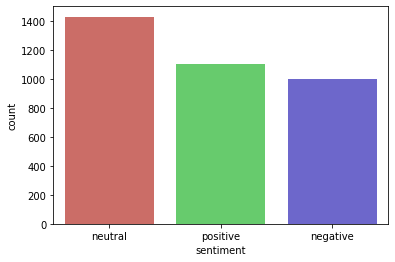

In [23]:
import seaborn as sb  
%matplotlib inline  
sb.countplot(x='sentiment', data = test_df, palette = 'hls')